Training ------------
Epoch 1/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.2627 - acc: 0.9290
Epoch 2/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.0734 - acc: 0.9784
Epoch 3/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0506 - acc: 0.9843
Epoch 4/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.0399 - acc: 0.9879
Epoch 5/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0311 - acc: 0.9903
Epoch 6/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0261 - acc: 0.9919
Epoch 7/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0207 - acc: 0.9935
Epoch 8/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0167 - acc: 0.9948
Epoch 9/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.0132 - acc: 0.9959
Epoch 10/100
60000/60000 [==============================] - 4s 73us/s

Epoch 80/100
60000/60000 [==============================] - 4s 73us/step - loss: 2.6877e-04 - acc: 1.0000
Epoch 81/100
60000/60000 [==============================] - 4s 73us/step - loss: 2.6876e-04 - acc: 1.0000
Epoch 82/100
60000/60000 [==============================] - 4s 73us/step - loss: 2.6876e-04 - acc: 1.0000
Epoch 83/100
60000/60000 [==============================] - 4s 73us/step - loss: 2.6876e-04 - acc: 1.0000
Epoch 84/100
60000/60000 [==============================] - 4s 72us/step - loss: 2.6876e-04 - acc: 1.0000
Epoch 85/100
60000/60000 [==============================] - 4s 72us/step - loss: 2.6876e-04 - acc: 1.0000
Epoch 86/100
60000/60000 [==============================] - 5s 81us/step - loss: 2.6876e-04 - acc: 1.0000
Epoch 87/100
60000/60000 [==============================] - 5s 78us/step - loss: 2.6876e-04 - acc: 1.0000
Epoch 88/100
60000/60000 [==============================] - 5s 80us/step - loss: 2.6876e-04 - acc: 1.0000
Epoch 89/100
60000/60000 [====================

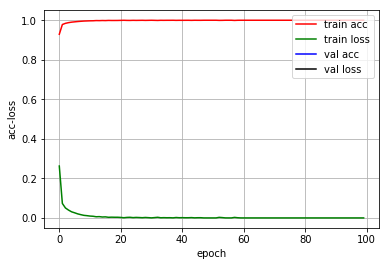

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 28, 28)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 64, 14, 14)        51264     
_________________________________________________________________
activation_6 (Activation)    (None, 64, 14, 14)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 7, 7)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3212288   
__________

In [119]:
import keras
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import Callback
from keras.utils import plot_model
import time
from keras import layers
start = time.clock()

#---------------------加载数据----------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#------------------------------------------------------
# 数据预处理
X_train = X_train.reshape(-1, 1,28, 28)/255.
X_test = X_test.reshape(-1, 1,28, 28)/255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# --------------------------------------------------------
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()
        
#-------------------------------------------------------------------------
#建立CNN网络
model = Sequential()

#--------------------------------------------------------
# 第一层卷积层Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',     # Padding method
    data_format='channels_first',
))

#---------------------------------------------------------
# 第一层池化层 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))

#--------------------------------------------------------------------------------------
# 第二层卷积层output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first',name='conv_1'))
model.add(Activation('relu'))

#---------------------------------------------------------------------------------------
# 第二层池化层 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

#---------------------------------------------------------------------------------------
# 第一层全连接层 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

#--------------------------------------------------------------------
# 第二层全连接层 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

#----------------------------------------------
#优化函数
adam = Adam(lr=1e-4)

#--------------------------------------------------------
# 编译函数
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#------------------------------------------------------
#创建一个实例history
history = LossHistory()

#--------------------------------------------------------------------------
print('Training ------------')
#训练
model.fit(X_train, y_train, epochs=100, batch_size=64,callbacks=[history])

#-----------------------------------------------------
print('\nTesting ------------')
# 测试
loss, accuracy = model.evaluate(X_test, y_test)

#----------------------------------------------------
print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)

#---------------------------------------------------------------------------
#绘制acc-loss曲线
history.loss_plot('epoch')
#----------------------
model.summary()
#----------------------------------------------------------------------------
#模型可视化
from keras import backend as K
intermediate_tensor_function = K.function([model.layers[0].input],[model.layers[2].output])
intermediate_tensor = intermediate_tensor_function([np.expand_dims(X_train[0],axis=0)])[0]

#运行时间
end = time.clock()
print(str(end-start))

In [2]:
intermediate_tensor.shape

(1, 32, 14, 14)

In [3]:
intermediate_tensor1=np.squeeze(intermediate_tensor)
intermediate_tensor1.shape


(32, 14, 14)

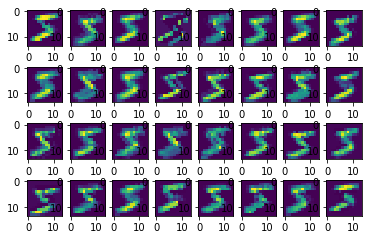

In [29]:
i=1
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=2
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=3
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=4
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=5
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=6
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=7
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=8
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=9
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=10
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=11
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=12
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=13
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=14
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=15
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=16
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=17
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=18
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=19
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=20
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=21
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=22
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=23
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=24
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=25
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=26
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=27
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=28
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=29
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=30
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=31
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=32
plt.subplot(4,8,i)
a=np.split(intermediate_tensor1,32)[i-1]
b=np.squeeze(a)
plt.imshow(b)

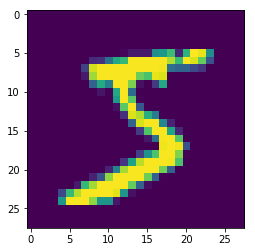

In [39]:
train0=np.squeeze(X_train[0])
train0.shape
plt.imshow(train0)

In [41]:
#模型可视化
from keras import backend as K
intermediate_tensor_function = K.function([model.layers[0].input],[model.layers[4].output])
intermediate_tensor = intermediate_tensor_function([np.expand_dims(X_train[0],axis=0)])[0]

In [43]:
intermediate_tensor2=np.squeeze(intermediate_tensor)
intermediate_tensor2.shape

(64, 14, 14)

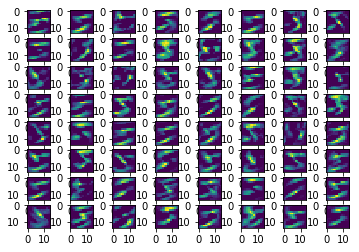

In [44]:
i=1
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=2
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=3
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=4
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=5
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=6
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=7
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=8
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=9
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=10
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=11
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=12
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=13
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=14
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=15
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=16
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=17
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=18
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=19
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=20
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=21
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=22
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=23
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=24
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=25
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=26
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=27
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=28
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=29
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=30
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=31
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=32
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=33
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=34
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=35
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=36
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=37
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=38
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=39
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=40
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=41
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=42
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=43
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=44
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=45
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=46
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=47
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=48
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=49
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=50
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=51
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=52
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=53
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=54
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=55
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=56
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=57
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=58
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=59
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=60
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=61
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=62
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=63
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)
i=64
plt.subplot(8,8,i)
a=np.split(intermediate_tensor2,64)[i-1]
b=np.squeeze(a)
plt.imshow(b)

In [63]:
from keras import layers
print(len(model.layers))
layer_count=len(model.layers)
for i,layer in enumerate(model.layers):
    print('layer:',i+1)
    print(len(layer.get_weights()))

11
layer: 1
2
layer: 2
0
layer: 3
0
layer: 4
2
layer: 5
0
layer: 6
0
layer: 7
0
layer: 8
2
layer: 9
0
layer: 10
2
layer: 11
0


In [83]:
firstconv=model.layers[0].get_weights()
firstconv[0].shape


(5, 5, 1, 32)

In [81]:
firstconv[1]

array([ 5.57106407e-03, -2.58124736e-03,  1.64578727e-03,  6.73596794e-03,
        1.78471601e-04,  1.14599225e-05,  3.24934558e-03,  3.19057057e-04,
       -2.38102162e-04,  5.23716968e-04, -3.68463574e-03,  1.96359190e-03,
        1.11650978e-03,  5.52802766e-03, -5.29839250e-04, -1.86513440e-04,
       -2.30180775e-03,  2.05965876e-03, -6.73827366e-04, -4.84341581e-04,
       -3.85146006e-04,  5.73413447e-04,  7.54403532e-04,  6.91723032e-03,
        1.22391926e-02,  8.26679985e-04,  8.09229678e-04,  3.23041156e-03,
       -3.31002462e-04,  3.67106812e-04,  1.87216653e-03,  6.68376638e-03],
      dtype=float32)

In [100]:
kernel1=np.squeeze(firstconv[0])
kernel1.shape
kernel1[0]

array([[-0.08805313,  0.09380116, -0.04046201,  0.07792794,  0.05108416,
         0.02996261, -0.05844218, -0.01849388, -0.02088237,  0.02195941,
        -0.08657142,  0.00186607, -0.08850647,  0.03914776,  0.09333587,
        -0.03772895,  0.0507766 , -0.05298146,  0.08289886,  0.07616016,
        -0.04866391,  0.01791228,  0.04796636, -0.01046191,  0.02792773,
        -0.0125396 ,  0.00131348, -0.08541305, -0.06240968, -0.05730431,
        -0.07863892, -0.00252571],
       [-0.08537915,  0.03193754,  0.02350293, -0.04718322, -0.06382828,
        -0.01239042, -0.03895134, -0.03491099, -0.0807418 ,  0.09807128,
         0.05687411, -0.08813192,  0.04560803,  0.02873576,  0.0240606 ,
         0.05703912, -0.06871427, -0.07973249, -0.0284497 ,  0.03898662,
         0.03948335,  0.00768683,  0.00569683,  0.06720413,  0.01192091,
        -0.0443523 , -0.06225149, -0.07147149, -0.09358913, -0.0221086 ,
        -0.09616886, -0.05383286],
       [ 0.07902613,  0.01790462, -0.0162395 , -0.0163

In [105]:
kernel1=np.transpose(kernel1,(1,0,2))
kernel1.shape


array([[-0.08805313, -0.02280157, -0.05509403, -0.04961232,  0.08095301],
       [-0.08537915, -0.02369647,  0.08019973,  0.0551182 ,  0.02601769],
       [ 0.07902613, -0.02521913,  0.0902568 ,  0.03471129,  0.0422074 ],
       [-0.04821368, -0.0062479 , -0.02447893,  0.0955942 ,  0.08996385],
       [-0.02248851, -0.02335842, -0.0610824 ,  0.10558649, -0.00754896]],
      dtype=float32)

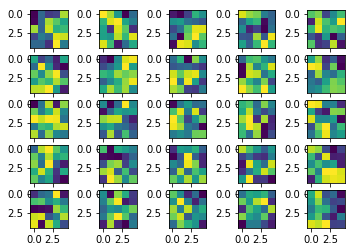

In [111]:
i=1
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=2
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=3
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=4
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=5
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=6
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=7
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=8
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=9
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=10
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=11
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=12
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=13
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=14
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=15
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=16
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=17
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=18
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=19
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=20
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=21
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=22
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=23
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=24
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])
i=25
plt.subplot(5,5,i)
plt.imshow(kernel1[i-1])



In [117]:
secondconv=model.layers[3].get_weights()
secondconv[0].shape

(5, 5, 32, 64)